In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [153]:
Dataset=pd.read_excel(r"C:\Users\KONARK\OneDrive\Desktop\Coffee Shop Sales.xlsx")

About Raw Dataset.

In [154]:
Dataset

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino


In [155]:
Dataset.columns

Index(['transaction_id', 'transaction_date', 'transaction_time',
       'transaction_qty', 'store_id', 'store_location', 'product_id',
       'unit_price', 'product_category', 'product_type', 'product_detail'],
      dtype='object')

In [156]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [157]:
Dataset.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [158]:
Dataset.tail()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino
149115,149456,2023-06-30,20:57:19,2,8,Hell's Kitchen,64,0.80,Flavours,Regular syrup,Hazelnut syrup


In [159]:
Dataset.isnull().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

Doing Modification In Dataset.

In [160]:
Dataset.drop(["transaction_time","product_detail"],axis=1,inplace=True)

In [161]:
Dataset=Dataset.rename(columns={"transaction_qty":"ordered_qty"})

In [162]:
products=Dataset["product_category"].value_counts().reset_index()

In [163]:
inp=[32,57,64,75,12,15,29,99,18]
inp_price=[3.20,3.00,3.50,4.50,0.80,1.50,3.10,4.00,2.50]
temp=0
for x in products["product_category"]:
    mask=(Dataset["product_category"]==x)
    Dataset.loc[mask,"product_id"]=int(inp[temp])
    Dataset.loc[mask,"unit_price"]=float(inp_price[temp])
    temp+=1

In [164]:
Dataset["amount"]=Dataset["ordered_qty"]*Dataset["unit_price"]

Checking Modification Result.

In [165]:
Dataset.columns

Index(['transaction_id', 'transaction_date', 'ordered_qty', 'store_id',
       'store_location', 'product_id', 'unit_price', 'product_category',
       'product_type', 'amount'],
      dtype='object')

In [166]:
Dataset[["product_id","unit_price","product_category"]].value_counts().reset_index()

,product_id,unit_price,product_category,count
0,32,3.2,Coffee,58416
1,57,3.0,Tea,45449
2,64,3.5,Bakery,22796
3,75,4.5,Drinking Chocolate,11468
4,12,0.8,Flavours,6790
5,15,1.5,Coffee beans,1753
6,29,3.1,Loose Tea,1210
7,99,4.0,Branded,747
8,18,2.5,Packaged Chocolate,487


In [167]:
Dataset[["product_category","ordered_qty","unit_price","amount"]].value_counts().reset_index()

,product_category,ordered_qty,unit_price,amount,count
0,Coffee,1,3.2,3.2,29177
1,Coffee,2,3.2,6.4,27646
2,Tea,1,3.0,3.0,22467
3,Bakery,1,3.5,3.5,22404
4,Tea,2,3.0,6.0,21676
5,Drinking Chocolate,1,4.5,4.5,5729
6,Drinking Chocolate,2,4.5,9.0,5489
7,Flavours,2,0.8,1.6,3452
8,Flavours,1,0.8,0.8,3213
9,Coffee beans,1,1.5,1.5,1738


In [168]:
Dataset

,transaction_id,transaction_date,ordered_qty,store_id,store_location,product_id,unit_price,product_category,product_type,amount
0,1,2023-01-01,2,5,Lower Manhattan,32,3.2,Coffee,Gourmet brewed coffee,6.4
1,2,2023-01-01,2,5,Lower Manhattan,57,3.0,Tea,Brewed Chai tea,6.0
2,3,2023-01-01,2,5,Lower Manhattan,75,4.5,Drinking Chocolate,Hot chocolate,9.0
3,4,2023-01-01,1,5,Lower Manhattan,32,3.2,Coffee,Drip coffee,3.2
4,5,2023-01-01,2,5,Lower Manhattan,57,3.0,Tea,Brewed Chai tea,6.0
...,...,...,...,...,...,...,...,...,...,...
149111,149452,2023-06-30,2,8,Hell's Kitchen,57,3.0,Tea,Brewed herbal tea,6.0
149112,149453,2023-06-30,2,8,Hell's Kitchen,57,3.0,Tea,Brewed Black tea,6.0
149113,149454,2023-06-30,1,8,Hell's Kitchen,57,3.0,Tea,Brewed herbal tea,3.0
149114,149455,2023-06-30,1,8,Hell's Kitchen,32,3.2,Coffee,Barista Espresso,3.2


Analysis.

In [169]:
#Total number of orders and total amount
print(f"Total number of Orders : {Dataset["ordered_qty"].sum()}")
print(f"Total Amount : {Dataset["amount"].sum()}")

Total number of Orders : 214470
Total Amount : 673839.8


In [170]:
#Numer of orders in each store location.
storecount=Dataset[["store_id","store_location"]].value_counts().reset_index()
storecount

,store_id,store_location,count
0,8,Hell's Kitchen,50735
1,3,Astoria,50599
2,5,Lower Manhattan,47782


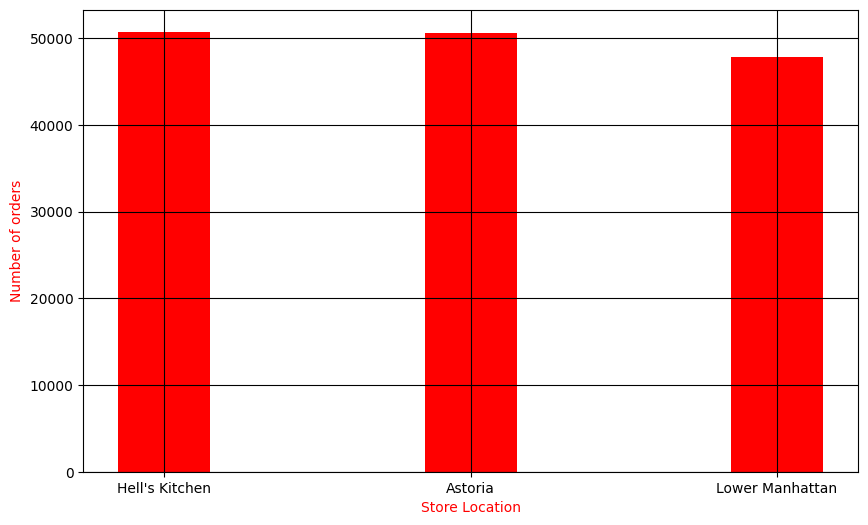

In [171]:
plt.figure(figsize=(10,6))
plt.bar(storecount["store_location"],storecount["count"],color="red",width=0.3)
plt.xlabel("Store Location",color="red")
plt.ylabel("Number of orders",color="red")
plt.grid(color="black")
plt.show()

In [172]:
#Giving the total count of all orders according to ordered quantity followed by all product categories in each store location.
Dataset[["store_location","product_category","ordered_qty"]].value_counts().reset_index().sort_values(by=["store_location","product_category"],ascending=[True,True])

,store_location,product_category,ordered_qty,count
12,Astoria,Bakery,1,7082
38,Astoria,Bakery,2,207
36,Astoria,Branded,1,279
0,Astoria,Coffee,1,10395
3,Astoria,Coffee,2,9630
31,Astoria,Coffee beans,1,502
15,Astoria,Drinking Chocolate,1,2249
16,Astoria,Drinking Chocolate,2,2051
27,Astoria,Flavours,1,774
28,Astoria,Flavours,2,716


In [173]:
#Total amount per location
per_store_amount=Dataset.groupby(["store_location"])[["amount"]].sum().reset_index()
per_store_amount

,store_location,amount
0,Astoria,226830.7
1,Hell's Kitchen,224574.8
2,Lower Manhattan,222434.3


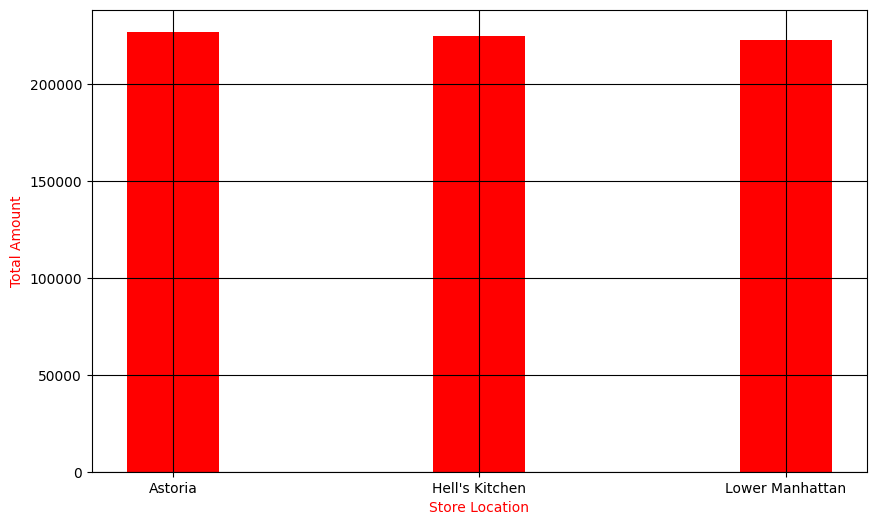

In [174]:
plt.figure(figsize=(10,6))
plt.bar(per_store_amount["store_location"],per_store_amount["amount"],color="red",width=0.3)
plt.xlabel("Store Location",color="red")
plt.ylabel("Total Amount",color="red")
plt.grid(color="black")
plt.show()

In [175]:
# Total amount per product category
per_product_amount=Dataset.groupby(["product_category"])[["amount"]].sum().reset_index()
per_product_amount

,product_category,amount
0,Bakery,81249.0
1,Branded,3104.0
2,Coffee,285600.0
3,Coffee beans,2742.0
4,Drinking Chocolate,78556.5
5,Flavours,8408.8
6,Loose Tea,3751.0
7,Packaged Chocolate,1217.5
8,Tea,209211.0


In [176]:
per_product_amount.describe()

,amount
count,9.000000
mean,74871.088889
std,104738.615286
min,1217.500000
25%,3104.000000
50%,8408.800000
75%,81249.000000
max,285600.000000


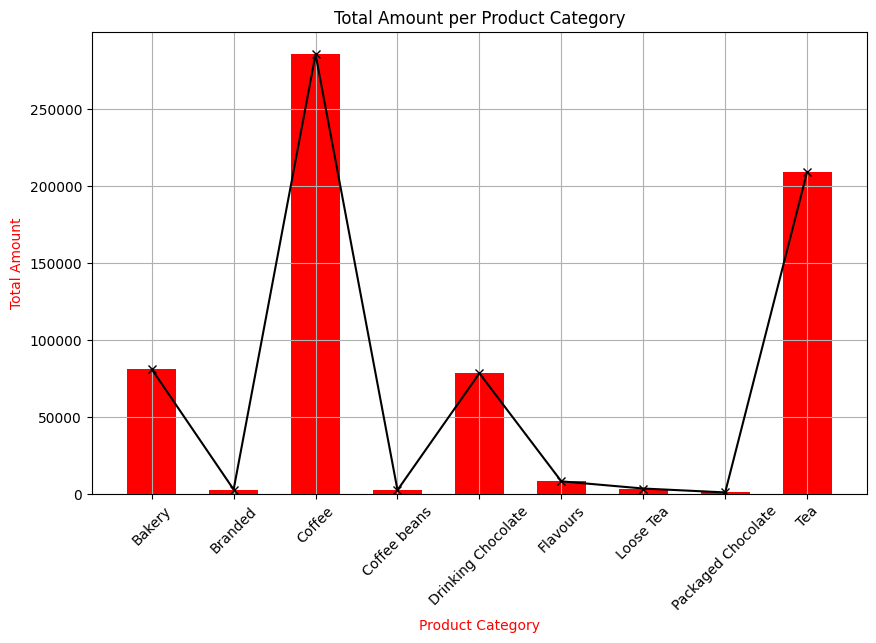

In [177]:
plt.figure(figsize=(10,6))
plt.bar(per_product_amount["product_category"],per_product_amount["amount"],color="red",width=0.6)
plt.plot(per_product_amount["amount"],color="black",marker="x")
plt.xticks(rotation=45)
plt.xlabel("Product Category",color="red")
plt.ylabel("Total Amount",color="red")
plt.title("Total Amount per Product Category",color="black")
plt.grid()
plt.show()

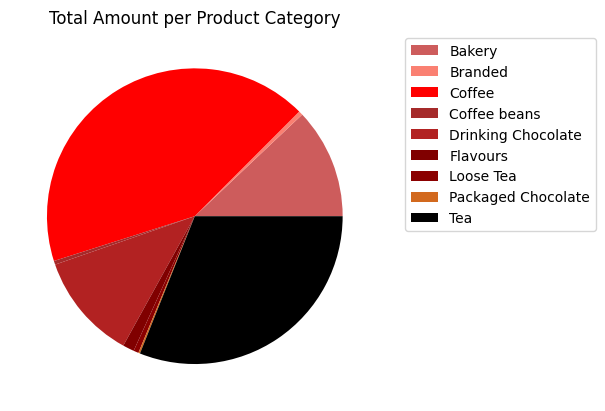

In [201]:
plt.pie(per_product_amount["amount"],colors=['indianred','salmon','red','brown','firebrick','maroon','darkred','chocolate','black'])
plt.legend(bbox_to_anchor=(1.05,1.0),labels=per_product_amount["product_category"])
plt.title("Total Amount per Product Category",color="black")
plt.show()

In [202]:
# Total Quantity per product category
per_product_quantity=Dataset.groupby(["product_category"])[["ordered_qty"]].sum().reset_index()
per_product_quantity

,product_category,ordered_qty
0,Bakery,23214
1,Branded,776
2,Coffee,89250
3,Coffee beans,1828
4,Drinking Chocolate,17457
5,Flavours,10511
6,Loose Tea,1210
7,Packaged Chocolate,487
8,Tea,69737


In [180]:
per_product_quantity.describe()

,ordered_qty
count,9.000000
mean,23830.000000
std,32935.076977
min,487.000000
25%,1210.000000
50%,10511.000000
75%,23214.000000
max,89250.000000


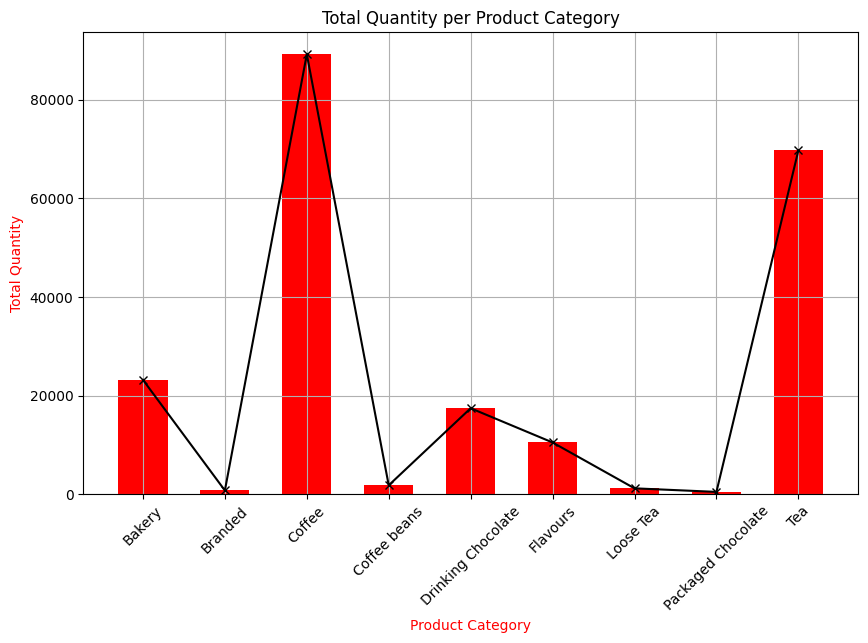

In [181]:
plt.figure(figsize=(10,6))
plt.bar(per_product_quantity["product_category"],per_product_quantity["ordered_qty"],color="red",width=0.6)
plt.plot(per_product_quantity["ordered_qty"],color="black",marker="x")
plt.xticks(rotation=45)
plt.xlabel("Product Category",color="red")
plt.ylabel("Total Quantity",color="red")
plt.title("Total Quantity per Product Category",color="black")
plt.grid()
plt.show()

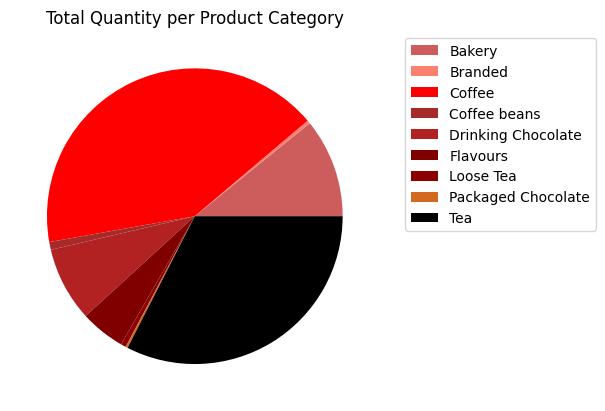

In [200]:
plt.pie(per_product_quantity["ordered_qty"],colors=['indianred','salmon','red','brown','firebrick','maroon','darkred','chocolate','black'])
plt.legend(bbox_to_anchor=(1.05,1.0),labels=per_product_quantity["product_category"])
plt.title("Total Quantity per Product Category",color="black")
plt.show()

Astoria

In [182]:
#Store in Location : 'Astoria'
data1=Dataset.where(Dataset["store_location"]=="Astoria")
data1.dropna(inplace=True)

In [183]:
#amount and quantity by product category at Astoria
amountByProduct=data1.groupby('product_category')[['ordered_qty','amount']].sum().reset_index()
amountByProduct

,product_category,ordered_qty,amount
0,Bakery,7496.0,26236.0
1,Branded,279.0,1116.0
2,Coffee,29655.0,94896.0
3,Coffee beans,502.0,753.0
4,Drinking Chocolate,6351.0,28579.5
5,Flavours,2206.0,1764.8
6,Loose Tea,344.0,1066.4
7,Packaged Chocolate,110.0,275.0
8,Tea,24048.0,72144.0


In [184]:
amountByProduct.describe()

,ordered_qty,amount
count,9.000000,9.000000
mean,7887.888889,25203.411111
std,11178.149125,35363.037733
min,110.000000,275.000000
25%,344.000000,1066.400000
50%,2206.000000,1764.800000
75%,7496.000000,28579.500000
max,29655.000000,94896.000000


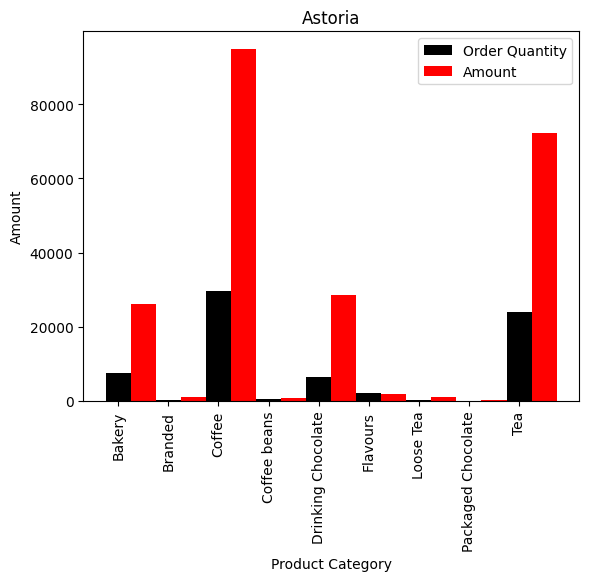

In [185]:
c=np.arange(len(amountByProduct["product_category"]))
plt.xticks(c,amountByProduct["product_category"],rotation=90)
plt.bar(c,amountByProduct["ordered_qty"],width=0.5,label="Order Quantity",color="black")
plt.bar(c+0.5,amountByProduct["amount"],width=0.5,label="Amount",color="red")
plt.xlabel("Product Category",color="black")
plt.ylabel("Amount",color="black")
plt.title("Astoria")
plt.legend()
plt.show()

Hell's Kitchen

In [186]:
#Store in Location : 'Hell's Kitchen'
data2=Dataset.where(Dataset["store_location"]=="Hell's Kitchen")
data2.dropna(inplace=True)

In [196]:
#amount and quantity by product category at Hell's Kitchen
amountByProduct=data2.groupby("product_category")[["ordered_qty","amount"]].sum().reset_index()
amountByProduct

,product_category,ordered_qty,amount
0,Bakery,7678.0,26873.0
1,Branded,119.0,476.0
2,Coffee,30220.0,96704.0
3,Coffee beans,790.0,1185.0
4,Drinking Chocolate,5672.0,25524.0
5,Flavours,3596.0,2876.8
6,Loose Tea,485.0,1503.5
7,Packaged Chocolate,197.0,492.5
8,Tea,22980.0,68940.0


In [197]:
amountByProduct.describe()

,ordered_qty,amount
count,9.000000,9.000000
mean,7970.777778,24952.755556
std,11036.846773,35154.426607
min,119.000000,476.000000
25%,485.000000,1185.000000
50%,3596.000000,2876.800000
75%,7678.000000,26873.000000
max,30220.000000,96704.000000


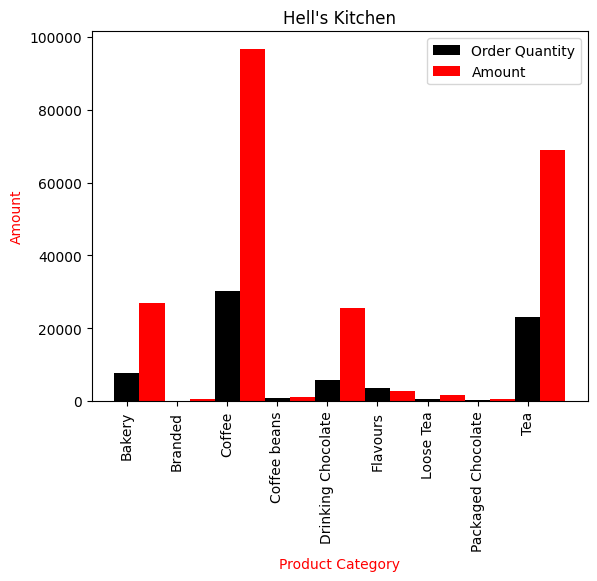

In [188]:
c=np.arange(len(amountByProduct["product_category"]))
plt.xticks(c,amountByProduct["product_category"],rotation=90)
plt.bar(c,amountByProduct["ordered_qty"],width=0.5,label="Order Quantity",color="black")
plt.bar(c+0.5,amountByProduct["amount"],width=0.5,label="Amount",color="red")
plt.xlabel("Product Category",color="red")
plt.ylabel("Amount",color="red")
plt.title("Hell's Kitchen")
plt.legend()
plt.show()

Lower Manhattan

In [189]:
#Store in Location : 'Lower Manhattan'
data3=Dataset.where(Dataset["store_location"]=="Lower Manhattan")
data3.dropna(inplace=True)

In [198]:
#amount and quantity by product category at Lower Manhattan
amountByProduct=data3.groupby("product_category")[["ordered_qty","amount"]].sum().reset_index()
amountByProduct

,product_category,ordered_qty,amount
0,Bakery,8040.0,28140.0
1,Branded,378.0,1512.0
2,Coffee,29375.0,94000.0
3,Coffee beans,536.0,804.0
4,Drinking Chocolate,5434.0,24453.0
5,Flavours,4709.0,3767.2
6,Loose Tea,381.0,1181.1
7,Packaged Chocolate,180.0,450.0
8,Tea,22709.0,68127.0


In [199]:
amountByProduct.describe()

,ordered_qty,amount
count,9.000000,9.000000
mean,7971.333333,24714.922222
std,10745.128478,34257.065634
min,180.000000,450.000000
25%,381.000000,1181.100000
50%,4709.000000,3767.200000
75%,8040.000000,28140.000000
max,29375.000000,94000.000000


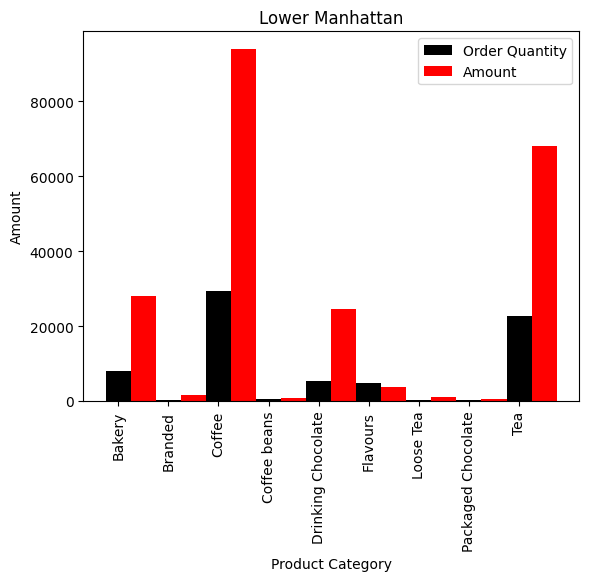

In [191]:
c=np.arange(len(amountByProduct["product_category"]))
plt.xticks(c,amountByProduct["product_category"],rotation=90)
plt.bar(c,amountByProduct["ordered_qty"],width=0.5,label="Order Quantity",color="black")
plt.bar(c+0.5,amountByProduct["amount"],width=0.5,label="Amount",color="red")
plt.xlabel("Product Category",color="black")
plt.ylabel("Amount",color="black")
plt.title("Lower Manhattan")
plt.legend()
plt.show()

In [192]:
Dataset

,transaction_id,transaction_date,ordered_qty,store_id,store_location,product_id,unit_price,product_category,product_type,amount
0,1,2023-01-01,2,5,Lower Manhattan,32,3.2,Coffee,Gourmet brewed coffee,6.4
1,2,2023-01-01,2,5,Lower Manhattan,57,3.0,Tea,Brewed Chai tea,6.0
2,3,2023-01-01,2,5,Lower Manhattan,75,4.5,Drinking Chocolate,Hot chocolate,9.0
3,4,2023-01-01,1,5,Lower Manhattan,32,3.2,Coffee,Drip coffee,3.2
4,5,2023-01-01,2,5,Lower Manhattan,57,3.0,Tea,Brewed Chai tea,6.0
...,...,...,...,...,...,...,...,...,...,...
149111,149452,2023-06-30,2,8,Hell's Kitchen,57,3.0,Tea,Brewed herbal tea,6.0
149112,149453,2023-06-30,2,8,Hell's Kitchen,57,3.0,Tea,Brewed Black tea,6.0
149113,149454,2023-06-30,1,8,Hell's Kitchen,57,3.0,Tea,Brewed herbal tea,3.0
149114,149455,2023-06-30,1,8,Hell's Kitchen,32,3.2,Coffee,Barista Espresso,3.2


In [193]:
perday=Dataset[["transaction_date","ordered_qty","amount"]]
perday

,transaction_date,ordered_qty,amount
0,2023-01-01,2,6.4
1,2023-01-01,2,6.0
2,2023-01-01,2,9.0
3,2023-01-01,1,3.2
4,2023-01-01,2,6.0
...,...,...,...
149111,2023-06-30,2,6.0
149112,2023-06-30,2,6.0
149113,2023-06-30,1,3.0
149114,2023-06-30,1,3.2


In [194]:
#Monthly aggregation
permonth=perday.resample("M", on="transaction_date")[["ordered_qty","amount"]].sum().reset_index()
permonth

C:\Users\KONARK\AppData\Local\Temp\ipykernel_16732\2401245285.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  permonth=perday.resample("M", on="transaction_date")[["ordered_qty","amount"]].sum().reset_index()


,transaction_date,ordered_qty,amount
0,2023-01-31,24870,78103.5
1,2023-02-28,23550,74024.4
2,2023-03-31,30406,95620.1
3,2023-04-30,36469,114601.1
4,2023-05-31,48233,151478.1
5,2023-06-30,50942,160012.6


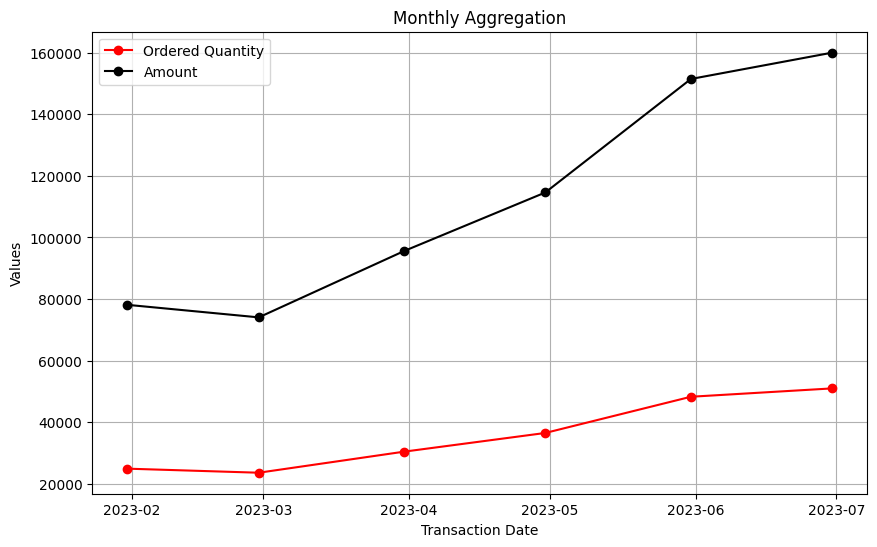

In [195]:
plt.figure(figsize=(10,6))
plt.plot(permonth["transaction_date"],permonth["ordered_qty"],color="red",marker="o",label="Ordered Quantity")
plt.plot(permonth["transaction_date"],permonth["amount"],color="black",marker="o",label="Amount")
plt.title("Monthly Aggregation")
plt.xlabel("Transaction Date")
plt.ylabel("Values")
plt.legend()
plt.grid()
plt.show()

# Insights from EDA
1. Total Amount Earned is $6,73,839.8
2. Total Quantity Sold is 2,14,470
3. Highest Amount is earned through location Astoria and amount earned is $2,26,830.7
4. Highly sold product is "coffee" solded 89,250 quantities and earned $2,85,600
5. Least Sold product is "packaged chocolate" solded 487 quantities and earned $1,217.5
6. Six months of sales data demonstrate continuous upward movement, reflecting good market performance

# Location : Astoria
1. Highly Sold Product is "Coffee" solded 29,655 quantities and earned amount is $94,896
2. Least sold product is "packaged chocolate" solded 110 quantities and earned amount is $275

# Location : Hell's Kitchen
1. Highly Sold Product is "Coffee" solded 30,220 quantities and earned amount is $96,704
2. Least sold product is "Branded" solded 119 quantities and earned amoount is $476

# Location : Lower Manhattan
1. Highly Sold Product is "Coffee" solded 29,375 quantities and earned amount is $94,000
2. Least sold product is "packaged chocolate" solded 180 quantities and earned amoount is $450